## Libraries Importing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Importing

In [2]:
df = pd.read_csv('Data\data.csv',index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [6]:
len(df.select_dtypes('object').columns)

1

In [19]:
numeric_col = df.select_dtypes('float64').columns
numeric_col

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

#### observations
- we has a small dataset of 32 columns and 569 rows
- 31 of the columns doesn't have any null values
- we have a column under name `Unnamed: 32` which needs to be dropped as it doesn't contain any value
- 30 columns are `floats`, and 1 column is `object`

## Data Cleaning

In [8]:
#drop Unnamed: 32 column
df.drop(columns='Unnamed: 32',inplace= True)

In [9]:
#checking the number of columns 
len(df.columns)

31

In [10]:
#confirming that our dataset has no null values
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
#cheking the dataset for any duplicates
df.duplicated().sum()

0

## Data preprocessing

Text(0, 0.5, 'Count')

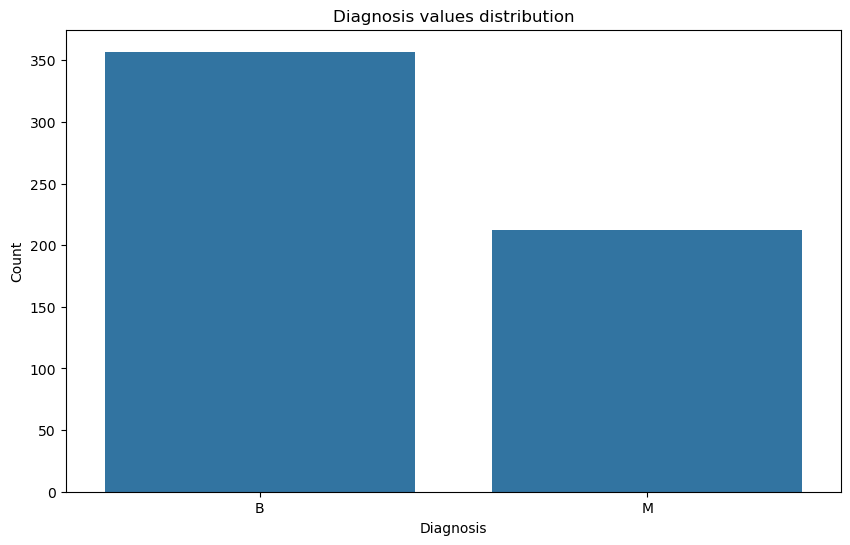

In [14]:
#check the balance of the `diagnosis` column
is_balanced = df['diagnosis'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=is_balanced.index, y = is_balanced.values)
plt.title('Diagnosis values distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

The chart shows that the 2 classes are slightly imbalanced, however they are not very far from each other, so we don't have to handle it with oversampling or undersampling methods

#### Target encoding

In [38]:
# Convert diagnosis to binary (M=1, B=0)
df['diagnosis_encoded'] = [1 if n== 'M' else 0 for n in df['diagnosis']]
df['diagnosis_encoded'].value_counts()

diagnosis_encoded
0    357
1    212
Name: count, dtype: int64

In [40]:
#drop diagnosis column
df.drop(columns = ['diagnosis'],inplace=True)
df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_encoded'],
      dtype='object')

#### Corrolation between target and features

In [43]:
pd.set_option('display.max_columns',31)
corr = df[numeric_col].corr()
corr[corr >= .8]


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,NaN,0.997855,0.987357,NaN,NaN,NaN,0.822529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.969539,NaN,0.965137,0.941082,NaN,NaN,NaN,NaN,NaN,NaN
texture_mean,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.912045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
perimeter_mean,0.997855,NaN,1.000000,0.986507,NaN,NaN,NaN,0.850977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.969476,NaN,0.970387,0.941550,NaN,NaN,NaN,NaN,NaN,NaN
area_mean,0.987357,NaN,0.986507,1.000000,NaN,NaN,NaN,0.823269,NaN,NaN,NaN,NaN,NaN,0.800086,NaN,NaN,NaN,NaN,NaN,NaN,0.962746,NaN,0.959120,0.959213,NaN,NaN,NaN,NaN,NaN,NaN
smoothness_mean,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.805324,NaN,NaN,NaN,NaN,NaN
compactness_mean,NaN,NaN,NaN,NaN,NaN,1.000000,0.883121,0.831135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.865809,0.816275,0.815573,NaN,NaN
concavity_mean,NaN,NaN,NaN,NaN,NaN,0.883121,1.000000,0.921391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.884103,0.861323,NaN,NaN
concave points_mean,0.822529,NaN,0.850977,0.823269,NaN,0.831135,0.921391,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830318,NaN,0.855923,0.809630,NaN,NaN,NaN,0.910155,NaN,NaN
symmetry_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fractal_dimension_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observations 
Based on the correlation matrix, here are the key insights and recommendations:

**Highly Correlated Features:**

- Radius, perimeter, and area (mean, se, and worst) are very highly correlated (>0.95), which is expected as the area, and perimeter is drevied from radius
- Concavity and concave points features are strongly correlated
- Compactness features show strong correlations with concavity features

**Feature Groups:**

- There are three main types of measurements for each feature: mean, se (standard error), and worst
- The 'worst' features often correlate strongly with their corresponding 'mean' features


**Key Independent Features:**

- Texture features show relatively low correlation with other features
- Symmetry and fractal dimension features are more independent
- Smoothness shows moderate correlations with other features

<Axes: >

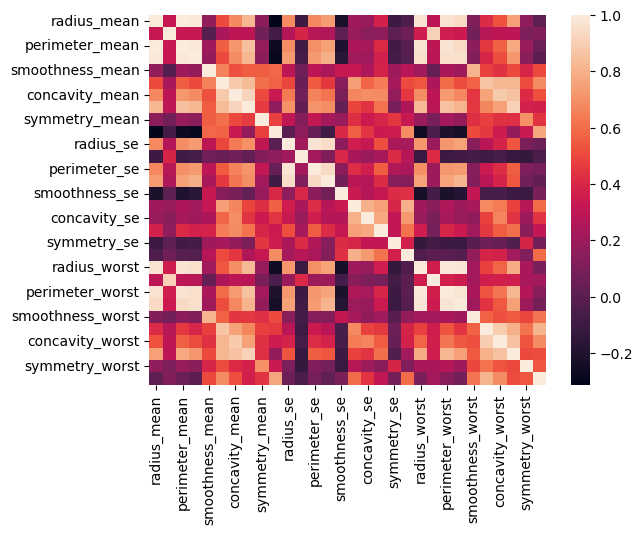

In [22]:
sns.heatmap()

In [51]:
df.corr()['diagnosis_encoded'].sort_values(ascending= False)

diagnosis_encoded          1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

#### observations
based os the feature corrolation, and feature-target corrolation we will drop the following columns
- radius_mean, and area_mean as they are have a high corrolation with perimeter mean and lower corrolation with the target
- radius_worst, and area_worst as they are have a high corrolation with perimeter worst and lower corrolation with the target
- perimeter_se, and area_se as they are have a high corrolation with redius se and lower corrolation with the target


In [52]:
#drop high collinearty columns
df.drop(columns= ['radius_mean','area_mean','radius_worst','area_worst','perimeter_se','area_se'],inplace=True)
df.columns

Index(['texture_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'perimeter_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'diagnosis_encoded'],
      dtype='object')

## Export the final dataframe

In [61]:
df.to_csv(r'Data\final_data.csv', index=False)